In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
DATA_PATH = os.path.join(os.getcwd(),'data','pokemon.csv')
df = pd.read_csv(DATA_PATH)
df.sample()

abilities  against_bug  against_dark  \
284  ['Effect Spore', 'Poison Heal', 'Quick Feet']          2.0           1.0   

     against_dragon  against_electric  against_fairy  against_fight  \
284             1.0               0.5            1.0            1.0   

     against_fire  against_flying  against_ghost  ...  percentage_male  \
284           2.0             2.0            1.0  ...             50.0   

     pokedex_number  sp_attack  sp_defense  speed  type1  type2  weight_kg  \
284             285         40          60     35  grass    NaN        4.5   

     generation  is_legendary  
284           3             0  

[1 rows x 41 columns]

In [3]:
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [4]:
categorical_features = list(df.select_dtypes(include=['object']).columns)

In [5]:
categorical_features

['abilities',
 'capture_rate',
 'classfication',
 'japanese_name',
 'name',
 'type1',
 'type2']

In [6]:
len(categorical_features)

7

In [7]:
numerical_features = list(df.select_dtypes(exclude=['object']).columns)

In [8]:
numerical_features

['against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'percentage_male',
 'pokedex_number',
 'sp_attack',
 'sp_defense',
 'speed',
 'weight_kg',
 'generation',
 'is_legendary']

In [9]:
len(numerical_features)

34

In [10]:
df[categorical_features].isna().sum()

abilities          0
capture_rate       0
classfication      0
japanese_name      0
name               0
type1              0
type2            384
dtype: int64

In [11]:
df['type2'].fillna('Unknown', inplace=True)

In [12]:
df[categorical_features].isna().sum()

abilities        0
capture_rate     0
classfication    0
japanese_name    0
name             0
type1            0
type2            0
dtype: int64

In [13]:
df[numerical_features].isna().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

In [14]:
for c in df[numerical_features].columns[df[numerical_features].isna().any()].tolist():
    df[c].fillna(df[c].mean() , inplace=True)

In [15]:
df[numerical_features].isna().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [16]:
#!pip install -U scikit-learn

### Convert Categorical Features to numerical values

In [17]:
categorical_features

['abilities',
 'capture_rate',
 'classfication',
 'japanese_name',
 'name',
 'type1',
 'type2']

In [18]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()

In [19]:
for c in categorical_features:
    df[c] = lenc.fit_transform(df[c])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    int32  
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

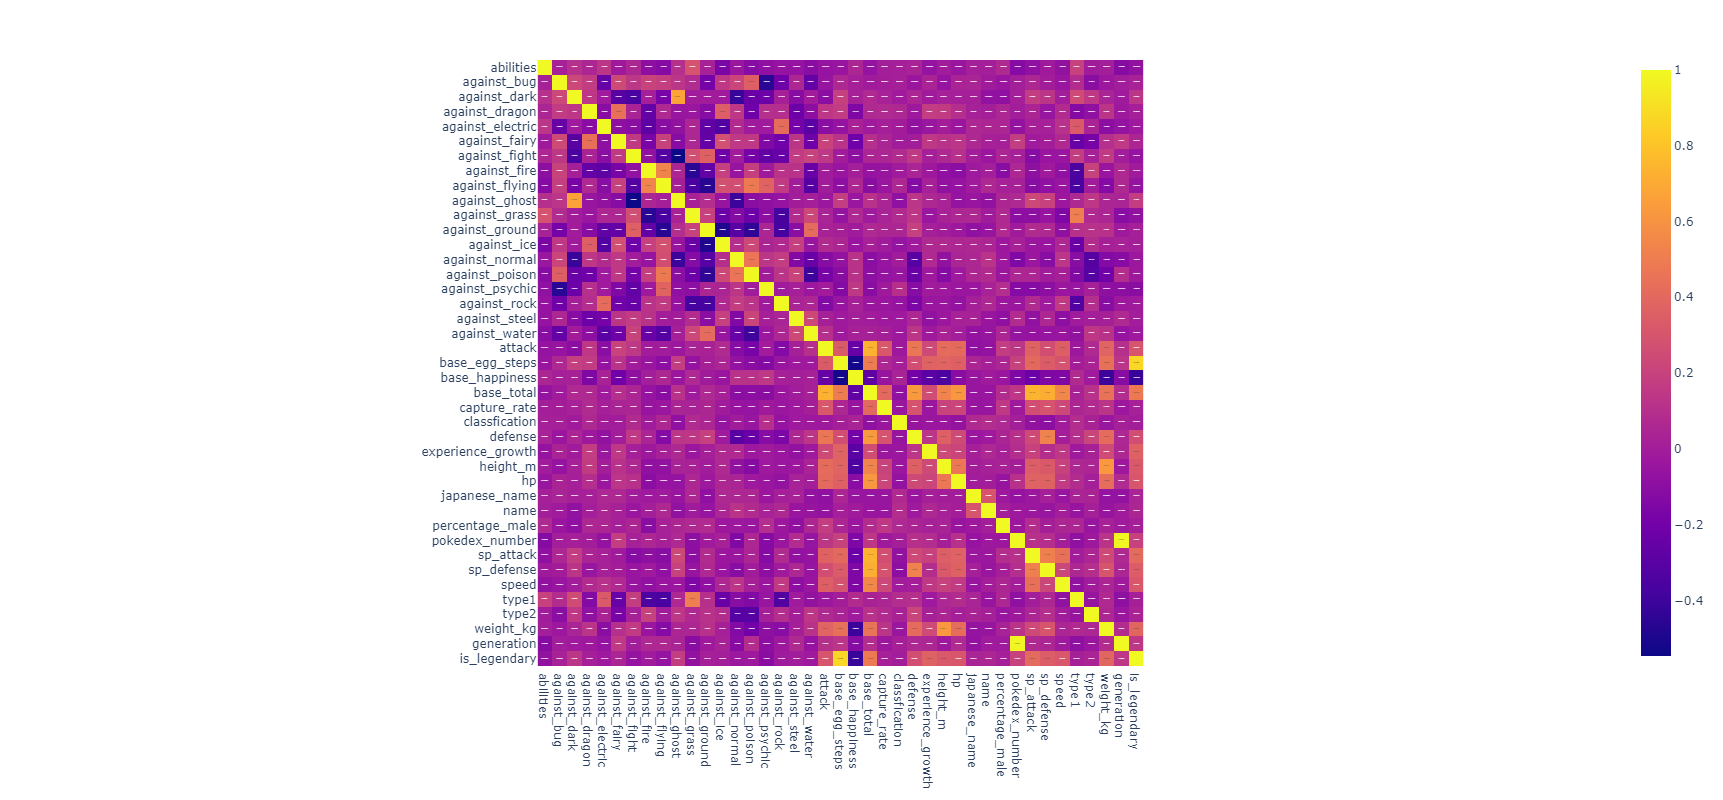

In [21]:
#plt.figure(figsize=(20, 15))
fig = px.imshow(df.corr(),text_auto=True,width=1500, height=800)
#fig.update_layout(autosize = True)
fig.show()

In [22]:
!pip install seaborn

In [23]:
import seaborn as sns

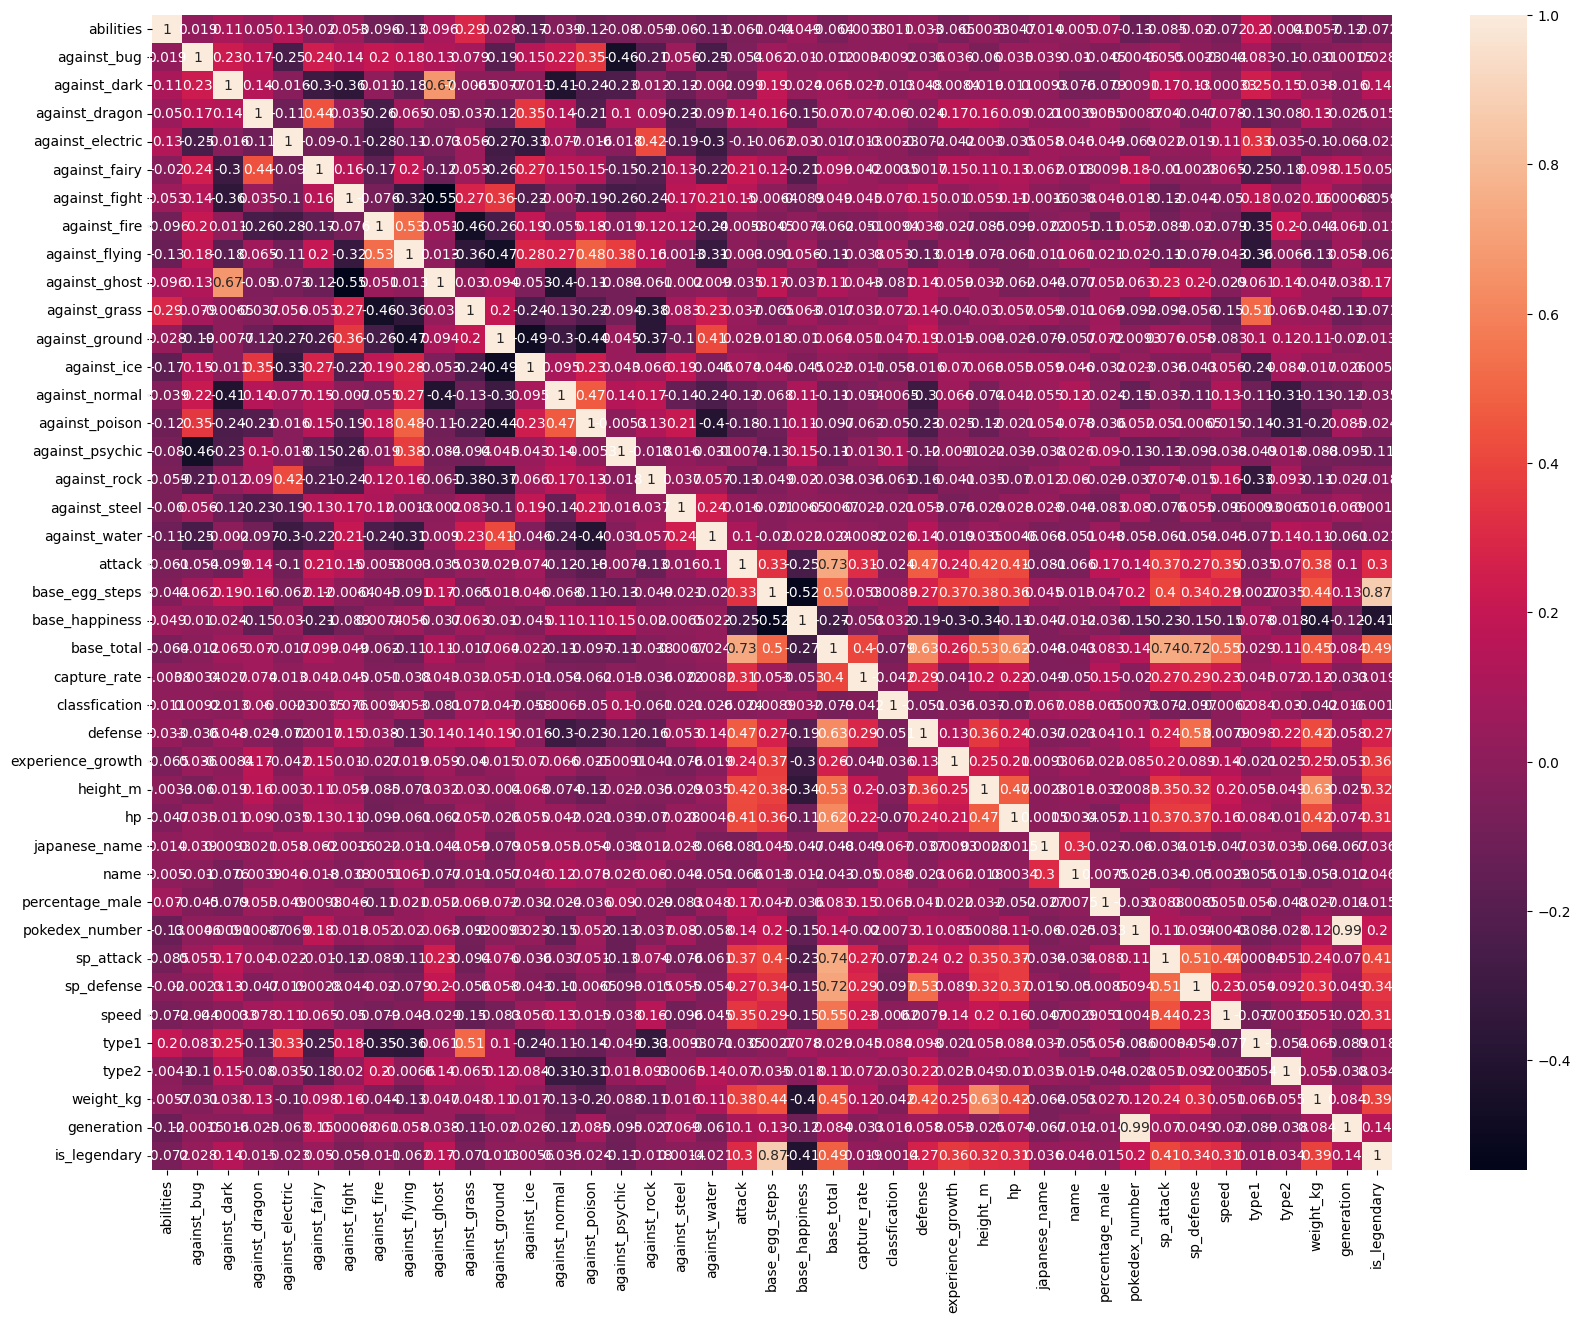

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
def trim_exhostive_corrleated_columns(df,limit_value):
    correlated_features = set()
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > limit_value:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

In [26]:
trim_exhostive_corrleated_columns(df,0.8)

{'generation', 'is_legendary'}

In [27]:
df.drop('generation', axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    int32  
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

### Finding Important Features

In [29]:
df.sample(5)

abilities  against_bug  against_dark  against_dragon  against_electric  \
488        126          1.0           1.0             1.0               2.0   
298        388          1.0           1.0             1.0               1.0   
342        201          2.0           2.0             1.0               0.0   
281        435          1.0           1.0             0.0               1.0   
321        238          0.5           1.0             1.0               0.0   

     against_fairy  against_fight  against_fire  against_flying  \
488            1.0           1.00           0.5             1.0   
298            1.0           2.00           0.5             0.5   
342            1.0           0.50           1.0             1.0   
281            1.0           0.25           1.0             1.0   
321            0.5           1.00           0.5             1.0   

     against_ghost  ...  name  percentage_male  pokedex_number  sp_attack  \
488            1.0  ...   505        55.155761             489         80   
298            1.0  ...   474        50.000000             299         45   
342            2.0  ...    35        55.155761             343         40   
281            2.0  ...   240        50.000000             282        165   
321            1.0  ...   475        50.000000             322         65   

     sp_defense  speed  type1  type2  weight_kg  is_legendary  
488          80     80     17      0        3.1             0  
298          90     30     15      0       97.0             0  
342          70     55     10     15       21.5             0  
281         135    100     14      5       48.4             0  
321          45     35      6     11       24.0             0  

[5 rows x 40 columns]

In [30]:
X = df.drop('is_legendary',axis=1)
y = df['is_legendary']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,n_jobs=1, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

### Ploting Features Importance

In [34]:
def plot_important_features_with_enasampling_randomforest_clf(fittedRandomForestClf,top_features_num):
    features = df.columns
    importances = fittedRandomForestClf.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(10,15))
    plt.title('Feature Importances')
    
    plt.barh(range(len(indices)),importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    
    plt.xlabel('Relative Importance')
    plt.show()

    all_feat = [features[i] for i in indices]
    all_feat = all_feat[::-1]
    top_required_features = all_feat[:top_features_num]

    other_feat = all_feat[top_features_num:]
    df.drop(other_feat, axis=1, inplace=True)
    
    return top_required_features


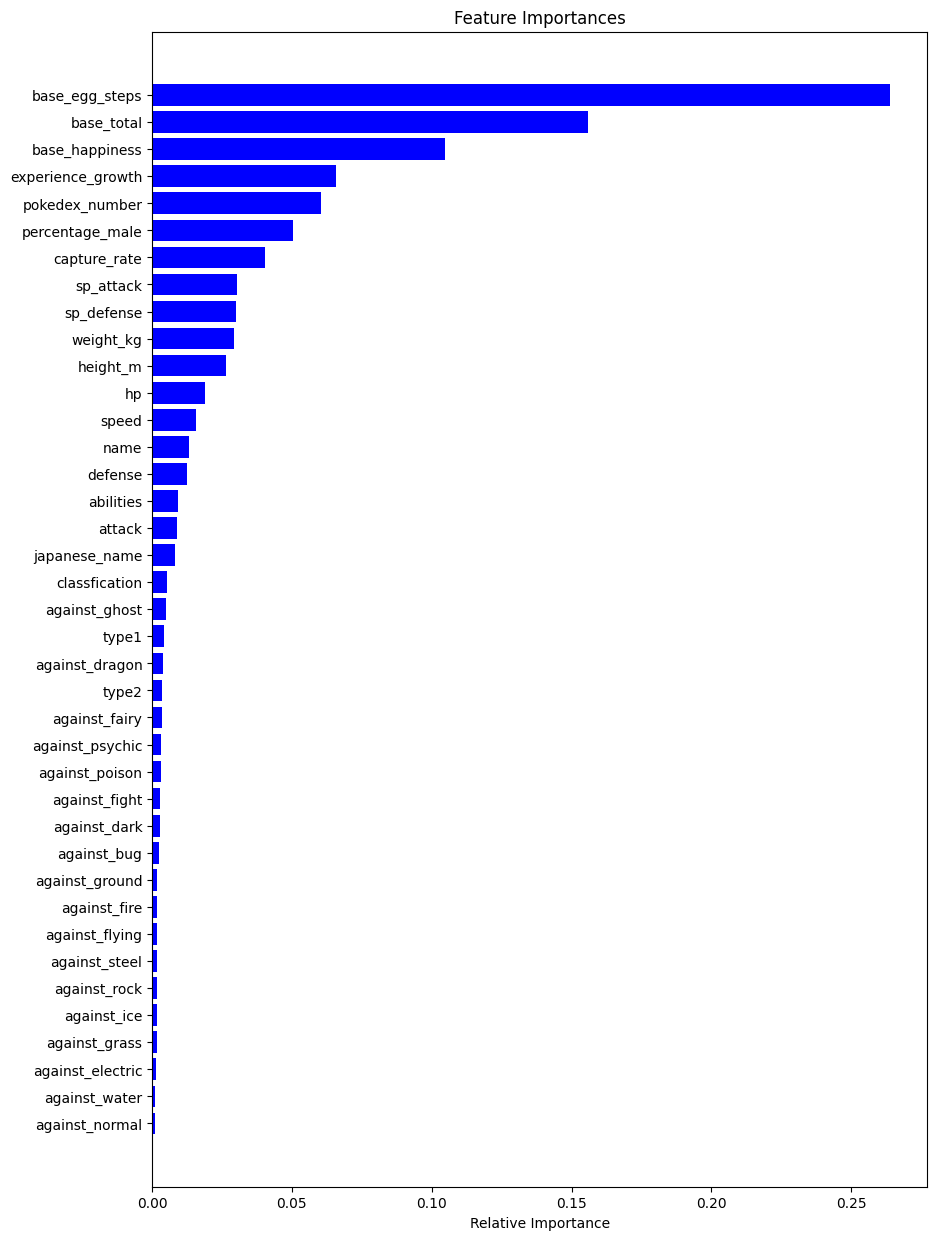

In [35]:
top_features = plot_important_features_with_enasampling_randomforest_clf(clf,15)

In [36]:
top_features

['base_egg_steps',
 'base_total',
 'base_happiness',
 'experience_growth',
 'pokedex_number',
 'percentage_male',
 'capture_rate',
 'sp_attack',
 'sp_defense',
 'weight_kg',
 'height_m',
 'hp',
 'speed',
 'name',
 'defense']